**SETTINGS**

In [2]:
 from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

import pydotplus #pip install pydotplus
import numpy as np

# Reading a dataset

In [8]:
df = pd.read_csv('/content/drive/My Drive/datasets/diabetes.csv')

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Comentários:

1. O problema de **classificação** acima consiste em predizer se um indivíduo tem ou não diabetes baseado em características como idade e massaa corporal, além de resultados de exames. O **atributo-alvo (classe)** do problema é o atributo class, que pode assumir dois valores: tested positive ou tested negative para diabetes. Sendo assim, se trata de um problema de **classificação binário**. Os atributos usados para predição são chamados de **atributos preditores**.  

2. Cada linha da tabela corresponde a um **exemplo ou instância**. A partir de um conjunto de** exemplos de treinamento**, um algoritmo de aprendizado de máquina constrói um **classificador** ou **modelo de classificação**.

3. Um modelo de classificação pode ser visto como uma função que relaciona os atributos preditores ao atributo-alvo. O modelo aprendido a partir dos dados de treinamento **aproxima** a função real de classificação, que é uma função desconhecida.

4. Cada algoritmo estima modelos com estruturas específicas. O melhor algoritmos dependerá do problema em questão.

**TRAINING AND TEST EXAMPLES**

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


Comentários:

1. Normalmente se considera um **conjunto de treinamento** usado para construir o modelo de classificação e um **conjunto de teste** independente para avaliar o desempenho preditivo do modelo construído.

2. Sempre é importante avaliar em dados de teste não usados no treinamento. Para modelos complexos sempre é possível aproximar os dados de treinamento perfeitamente, i.e., aprender um modelo que não comete erros de predição para os dados de treinamento. No entanto, fazer isso pode levar a um **superajuste (ou overfitting)** dos dados de treinamento, i.e., o modelo aprende exceções dos dados que não estarão presentes nos dados de teste.

3. O ideal é aprender modelos que **generalizem** bem, i.e., o modelo deve aprender características gerais do problema de classificação e ser complexo apenas o necessário.

### **LEARNING A DECISION TREE**

Árvores de decisão são modelos que particionam os exemplos de treinamento usado testes sucessivos sobre os atributos preditores. A cada teste realizado, os exemplos de treinamento de uma mesma classe são separados dos demais exemplos. A classificação final é realizada nos nós terminais, associados a um classe específica, normalmente a classe majoritária entre os exemplos de treinamento que atingem o nó.  

**Fitting a tree**

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_leaf = 30)

dt.fit(X_train, Y_train)




DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=30)

Comentários:

1. Cada algoritmo de aprendizado pode estar associados a **hiperparâmetros** específicos que impactam na estrutura do modelo aprendido. No código acima, por exemplo, o hiperparâmetro max-depth controla a **profundidade máxima** da árvore de decisão aprendida.

2. Um valor muito baixo para profundidade da árvore pode gerar um modelo muito simples, não suficiente para aproximar bem a função real do problema de classificação. Por outro lado, um valor muito alto pode resultado em overfitting dos dados de treinamento.

3. Outros algoritmos também apresentam hiperparâmetros que de uma forma ou de outra controlam a **complexidade** dos modelos de classificação gerados.

**Code to visualize the tree**

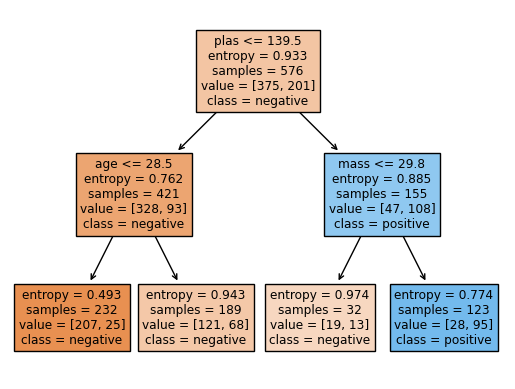

In [16]:
from sklearn import tree


tree.plot_tree(dt, feature_names = X.columns, class_names=['negative', "positive"],filled = True);


Comentários:

1. Um teste na árvore de decisão cria um plano de separação no espaço de exemplos. Dois testes aplicados de forma sucessiva cria um retângulo delimitando uma região de exemplos, três testes definem um cubo, quatro testes em diante forma o que chamamos de hipercubos.

2. Por essa razão, as superfíceis de seraração de uma árvore de decisão em geral são muito simples, que nem sempre são suficientes para problemas com **fronteiras de classe** mais complexas.

3. No entanto, é um **modelo interpretável** e que pode produzir insights interessantes sobre o problema em mãos. Cada nó terminal pode ser considerado uma regra local, i.e., um conhecimento válido para um conjunto específico de instâncias. Cada regra pod inclusive ser avaliada de forma separada, usando métricas de confiança e suporte.

4. Probabilidades de classe podem ser estimadas a partir a distribuição de classes dos exemplos de treinamento que alcançam o nó. Por exemplo, se um dado nó apresenta 50 exemplos da classe positiva e 18 exemplos da classe negativa, então a probabilidade estimada para a classe positiva seria 50/(50+18) ~ 0.73. Ou seja, caso um novo exemplo a ser predito alcance esse nó terminal, podemos dizer que a probabilidade estimada do exemplo pertencer a classe positiva é de 0.73. Essa probabilidade se chama **probabilidade condicional ou probabilidade à posteriori**, i.e., probabilidade de classe condicionada pelos valores dos atributos do exemplo (P(Y|X)).

5. As probabilidades condicionais normalmente são diferentes das **probabilides à priori**, que são estimadas pela frequencia de exemplos de cada classe na base de treinamento.

### **TESTING THE DECISION TREE**

--- Computing the model accuracy

In [17]:
from sklearn.metrics import accuracy_score

Yhat = dt.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.71875


Observação: A **acurária** simplesmente calcula a proporção de acertos total do modelo para os dados de teste.

---- Confusion matrix

A **matrix de confusão** apresenta os acertos e erros do modelo nos dados usados para teste. Também pod ser chamada de **matriz de contingência**.

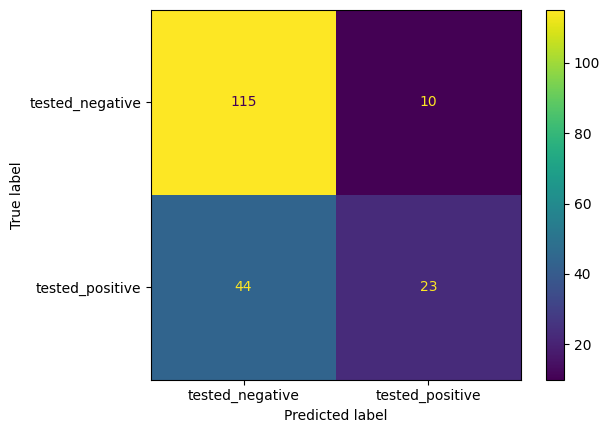

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

disp.plot()

plt.show()

Comentários:

1. Em problemas de classificação binária, podemos distinguir quatro casos:

(a) Verdadeiros positivos (VP): exemplos de teste da classe positiva classificados corretamente pelo modelo como sendo da classe positiva;  

(b) Verdadeiros negativos (VN): exemplos de teste da classe negativa classificados corretamente pelo modelo como sendo da classe negativa;

(c) Falsos positivos (FP): exemplos de teste da classe negativa classificados erroneamente pelo modelo como sendo da classe positiva;

(d) Falsos negativos (FN): exemplos de teste da classe positiva classificados erroneamente pelo modelo como sendo da classe negativa.

2. Em muitos casos, como no diagnóstivo médico, a classe positiva é a classe de maior interesse, uma vez que um falso negativo tende a ter consequencias muito mais negativas em comparação com um falso positivo (que seria "apenas" um falso alarme).

3. Note que o numero de predições positivas do modelo é o numero de VP + FP. Em muitas situações, é possivel forçar modelos que apresentem uma taxa maior de predições positivas, visando aumentos a taxa de VP, mesmo a despeito de um acréscimo na taxa de FP. Esse mecanismo é a base da análise da curva ROC.

### **LEARNING A RANDOM FOREST MODEL**

Random Forests são modelo que combinam várias (possivelmente centenas) árvores de decisão, visando aumento do desempenho preditivo. Cada árvore de decisão é treinada usando um subconjunto de exemplos e atributos diferentes. No final, teremos umn comitê de árvores de decisão que serão combinadas para predizer a classe de cada exemplo de teste. A predição é feita considerando a classe mais frequente entre as predições das árvores de decisão do comitê;

In [19]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, max_features = 3)

rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=3, n_estimators=200)

--- INSPÉCTING THE FEATURE IMPORTANCE

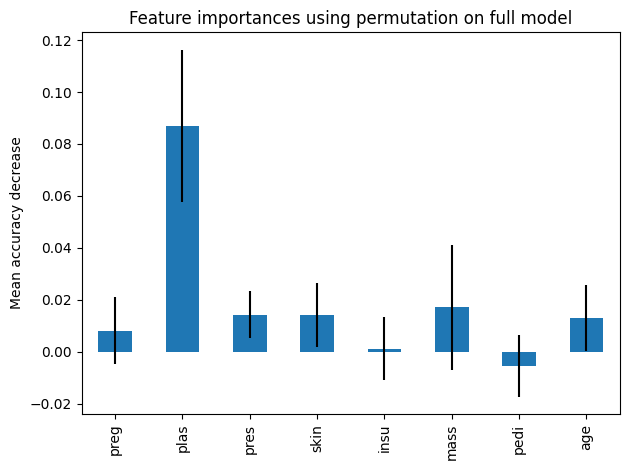

In [20]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Comentários:

1. Cada árvore de decisão do RF é um modelo fraco globalmente mas "possivelmente" bom localmente. A combinação de vários modelos locais é a aposta dos modelos de RF, assim como vários outros métodos de comitês (ou ensembles).

2. Não faz tando sentido inspecionar cada árvore de decisão do comitê, umavez que são fracas e muitas. O modelo de RF não é diretamente interpretável, o que requer métodos de explicabilidade como o gráfico de Feature Importance acima.

### **TESTING THE RANDOM FOREST MODEL**

--- Computing the model accuracy

In [21]:
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.7447916666666666


--- Computanndo predições na forma de classes preditas

In [22]:
rf.predict(X_test)


array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negati

--- Computando predições na forma probabilidades. A avaliação dessas probabildiades requere outras métricas como Brier score e log loss.

In [24]:
# Returning the class probabilities if necessary
rf.predict_proba(X_test)

array([[0.765, 0.235],
       [0.595, 0.405],
       [0.735, 0.265],
       [0.765, 0.235],
       [0.89 , 0.11 ],
       [0.23 , 0.77 ],
       [0.925, 0.075],
       [0.145, 0.855],
       [0.915, 0.085],
       [0.89 , 0.11 ],
       [0.955, 0.045],
       [0.635, 0.365],
       [0.995, 0.005],
       [0.985, 0.015],
       [0.225, 0.775],
       [0.455, 0.545],
       [0.785, 0.215],
       [0.76 , 0.24 ],
       [0.85 , 0.15 ],
       [0.12 , 0.88 ],
       [0.44 , 0.56 ],
       [0.625, 0.375],
       [0.845, 0.155],
       [0.58 , 0.42 ],
       [0.84 , 0.16 ],
       [0.355, 0.645],
       [0.6  , 0.4  ],
       [0.24 , 0.76 ],
       [0.78 , 0.22 ],
       [0.975, 0.025],
       [0.665, 0.335],
       [0.495, 0.505],
       [0.4  , 0.6  ],
       [0.295, 0.705],
       [0.385, 0.615],
       [0.215, 0.785],
       [0.705, 0.295],
       [0.275, 0.725],
       [0.51 , 0.49 ],
       [0.23 , 0.77 ],
       [0.845, 0.155],
       [0.84 , 0.16 ],
       [0.93 , 0.07 ],
       [0.2

---- Confusion matrix

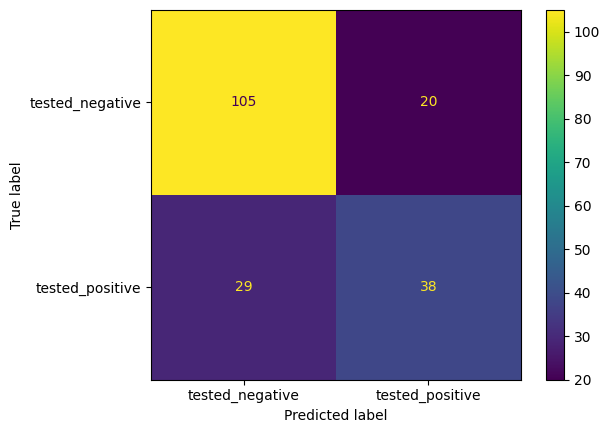

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

# Considerações finais

1. Introduzimos o problema de classificação, em que a classe de uma dada entidade de interesse (e.g., pacientes) são preditas a partir de atribuitos preditores (e.g., sintomas). Um algoritmo de aprendizado recebe como entrada um conjunto de exemplos de treinamento e com isso construi uma função (modelo) para classificações de novas instâncias.

2. As predições de um modelo nem sempre (ou quase nunca) são totalmente corretas para qualquer exemplo, uma vez que: (a) relação entre os atributos preditores e o atributo alvo pode ser não-determinística em si; (b) os dados de treinamento não contém informação suficiente para estimar um bom modelo; ou (c) o algoritmo errado foi escolhido ou mal-aplicado (por exemplo, com hiperparâmetros errados).

3. Pelas razões acima, sempre é importante fazer uma avaliação com um conjunto de teste independente e calcular métricas para avaliação, como a acurácia. Existem muitas outras métricas, claro.

4. Existem muitos algoritmos de aprendizagem diferentes. Vimos dois modelos bem conhecidos: árvores de decisão (AD) e random forests (RF). AD são modelos interpretáveis (ditos caixa-branca) mas nbem sempre têm um bom desempenho preditivo. RF são modelos potencialmente melhores mas não são interpretáveis diretamente, o que requer ferramentas auxiliares.